In [71]:
import tensorflow as tf

#Fashion MNIST dataset

##Load the dataset

In [72]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [73]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


# Normalize data

In [74]:
# Number of pixels in one image (28x28 = 784) 
N_pixels = X_train.shape[1]*X_train.shape[2]

# Convert to floats and normalize to [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("Normalized X_train.shape = ", X_train.shape, "\nNormalized X_test.shape = ", X_test.shape)

Normalized X_train.shape =  (60000, 28, 28) 
Normalized X_test.shape =  (10000, 28, 28)


In [75]:
import numpy as np
values, counts = np.unique(y_test, return_counts=True)

In [76]:
values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Above the minimum code you may want to use to load and ouput some information of the dataset. You may need to explore more to answer the following questions.



1.   How many samples in training set? Answer: 60000
2.   How many samples in test set? Answer: 10000
3.   How many classes in the dataset? Answer: 10 

###Display $10$ random samples in the training set and $10$ random samples in the test set.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt


# Display training set
Note that :
1. X_train: Normalized X_train
2. X_test: Normalized X_test

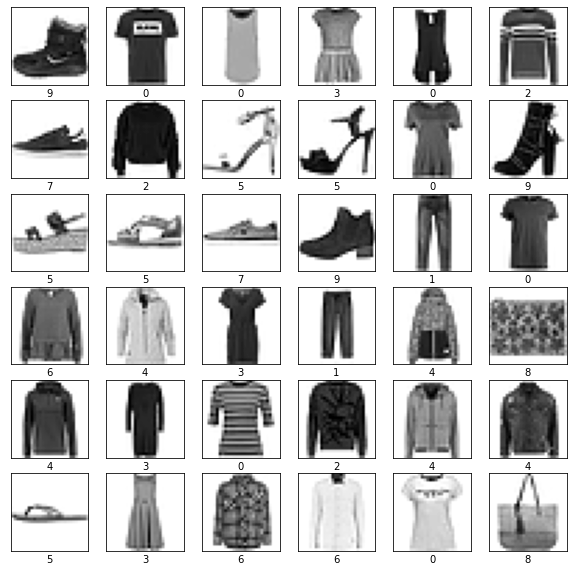

In [78]:
import math
import matplotlib.pyplot as plt

#Display training set
ndis = 36
n = math.sqrt(ndis)

plt.figure(figsize=(10,10))
for i in range(ndis):
  plt.subplot(n,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()


# Display test set

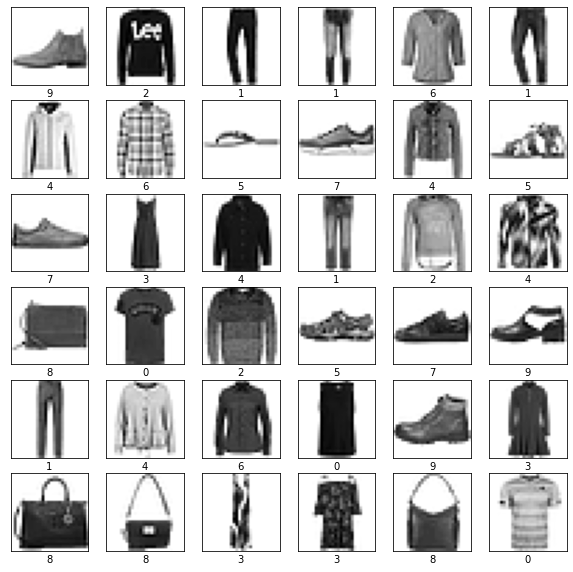

In [79]:
#Display test set
ndis = 36
n = math.sqrt(ndis)

plt.figure(figsize=(10,10))
for i in range(ndis):
  plt.subplot(n,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.xlabel(y_test[i])
plt.show()


# Reshape X_train and X_test in order to use CNN layers

The original data has a shape of 28x28. It is an image of gray scale. 

Number of channel (chn) = 1

In [80]:
#Reshape X_train and X_test 

X_train_rs = X_train.reshape(60000, 28, 28, 1)
X_test_rs = X_test.reshape(10000, 28, 28, 1)

In [81]:
X_train_rs.shape

(60000, 28, 28, 1)

In [82]:
X_test_rs.shape

(10000, 28, 28, 1)

In [83]:
#Check the values of a X_train sample e.g. 4th image; 
#Expect a 28x28
X_train_rs[4].shape

(28, 28, 1)

In [84]:
X_train_rs[4][2] # 4th image, 2nd row
#Expect the values to be normalized (0:1)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.7529412 ],
       [0.8901961 ],
       [0.91764706],
       [0.9529412 ],
       [0.9019608 ],
       [0.5764706 ],
       [0.9372549 ],
       [0.9490196 ],
       [0.91764706],
       [0.85490197],
       [0.81960785],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

#Build your own CNN, train and test it on the test set.

- You can use Dropout layer (because we have used BatchNorm in your class activities).

##Build your model

In [85]:
# Your code
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, Activation

# Model 1; Dropout = 0.2; 

In [86]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), activation='relu', padding='same', kernel_initializer='he_uniform'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#model.add(Conv2D(kernel_size=(5,5), activation='relu', padding='same', filters=16,kernel_initializer='he_uniform'))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model1.add(Flatten())

model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

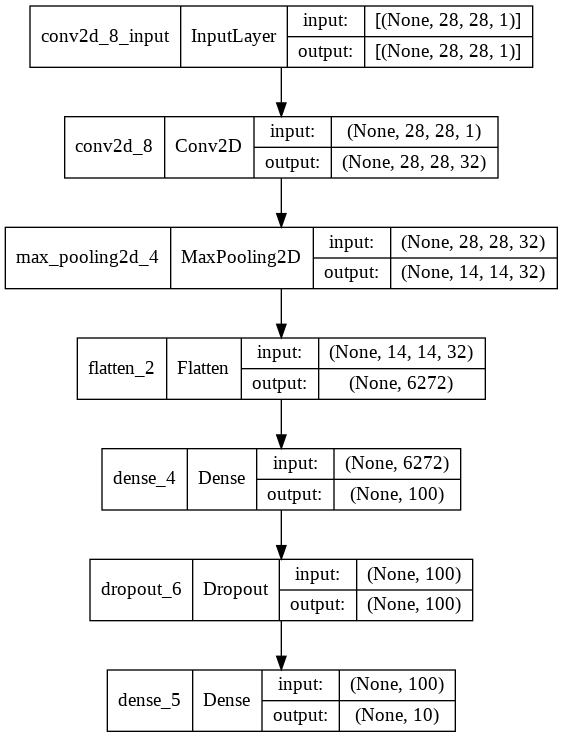

In [87]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [88]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               627300    
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [89]:
#Compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

##Train it

In [90]:
X_train_rs.shape

(60000, 28, 28, 1)

In [91]:
# Your code
history1 = model1.fit(X_train_rs, y_train, epochs=20, validation_data=(X_test_rs, y_test), verbose = 0)

In [92]:
model1.save('model1_cnn.h5', save_format='h5')

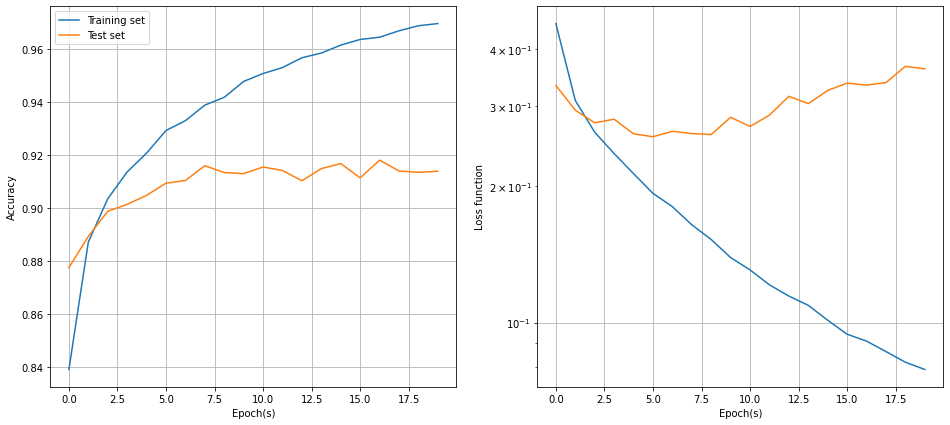

In [94]:
# Plotting

plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label = "Training set")
plt.plot(history1.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.semilogy(history1.history["loss"], label ="Training set")
plt.semilogy(history1.history["val_loss"], label ="Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

# Model 1 Training set metrics

In [97]:
train_loss1, train_acc1 = model1.evaluate(X_train_rs, y_train)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0391 - accuracy: 0.9864


In [98]:
print("Training loss: ", train_loss1)
print("Training accuracy: ", train_acc1)

Training loss:  0.03906365856528282
Training accuracy:  0.9864333271980286


##Model 1 Test set metrics

In [95]:
val_loss1, val_acc1 = model1.evaluate(X_test_rs, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.3620 - accuracy: 0.9139


In [96]:
print("Val loss: ", val_loss1)
print("Val accuracy: ", val_acc1)

Val loss:  0.36196866631507874
Val accuracy:  0.9139000177383423


# Model 2; Dropout = 0.4

In [99]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), activation='relu', padding='same', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Flatten())

model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

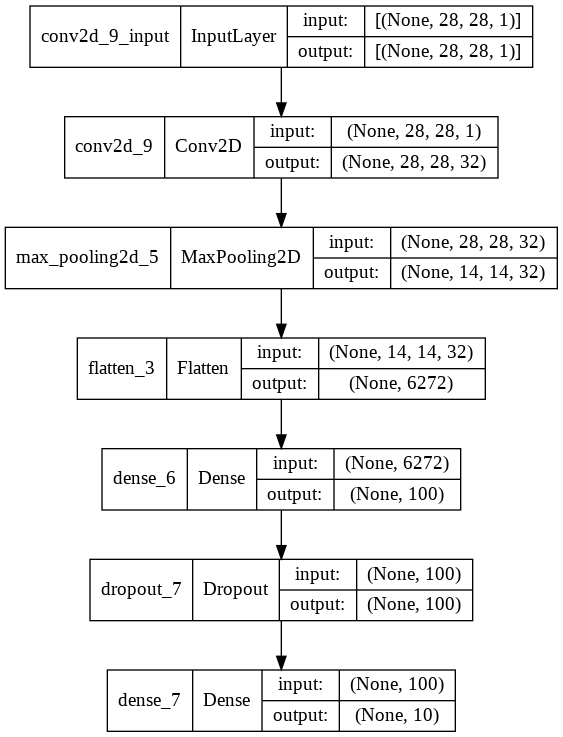

In [100]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [101]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               627300    
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      

In [102]:
#Compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [103]:
# Your code
history2 = model2.fit(X_train_rs, y_train, epochs=20, validation_data=(X_test_rs, y_test), verbose = 0)

In [104]:
model2.save('model2_cnn.h5', save_format='h5')

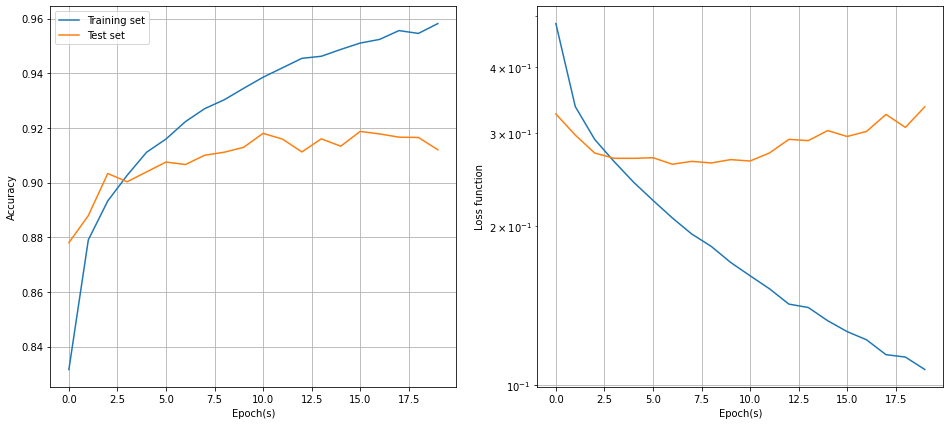

In [105]:
# Plotting

plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label = "Training set")
plt.plot(history2.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.semilogy(history2.history["loss"], label ="Training set")
plt.semilogy(history2.history["val_loss"], label ="Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [106]:
train_loss2, train_acc2 = model2.evaluate(X_train_rs, y_train)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0569 - accuracy: 0.9794


In [107]:
print("Training loss: ", train_loss2)
print("Training accuracy: ", train_acc2)

Training loss:  0.0569198839366436
Training accuracy:  0.9794333577156067


In [108]:
val_loss2, val_acc2 = model2.evaluate(X_test_rs, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3368 - accuracy: 0.9120


In [109]:
print("Val loss: ", val_loss2)
print("Val accuracy: ", val_acc2)

Val loss:  0.33684414625167847
Val accuracy:  0.9120000004768372


# Model 4 New architecture

In [21]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1)))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=1))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model4.add(Conv2D(64, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
		
# softmax classifier
model4.add(Dense(10))
model4.add(Activation("softmax"))

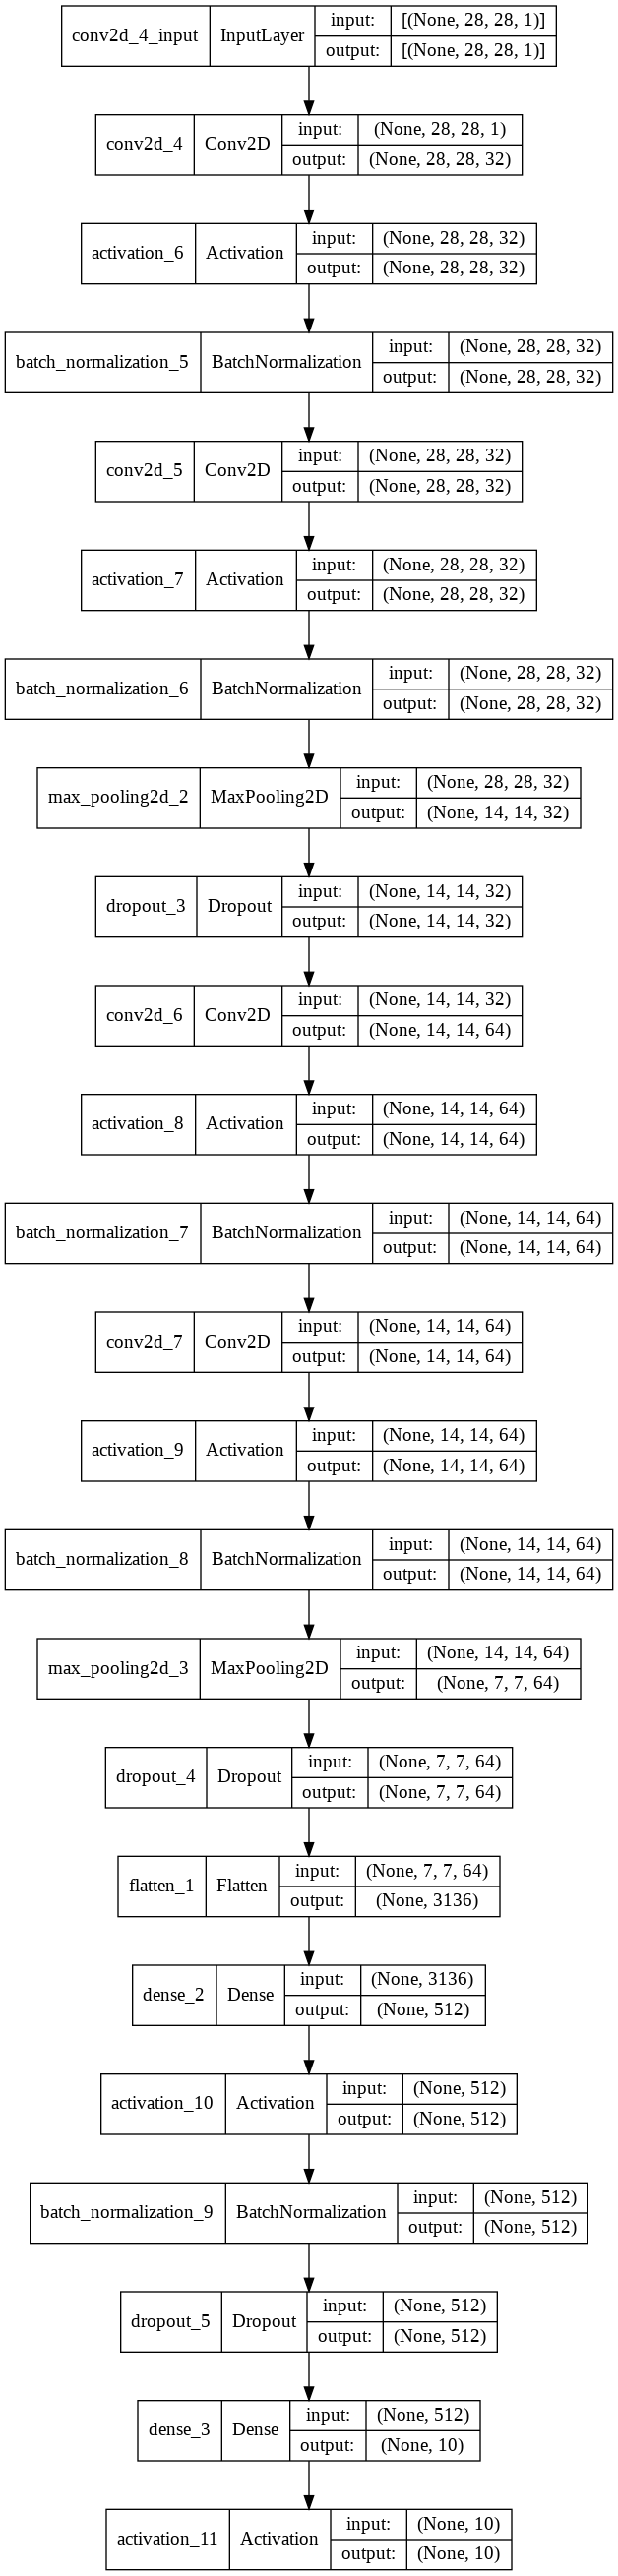

In [22]:
tf.keras.utils.plot_model(model4, show_shapes=True, show_layer_names=True)

In [23]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       112       
 hNormalization)                                      

In [24]:
#Compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model4.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [25]:
# Your code
history4 = model4.fit(X_train_rs, y_train, epochs=20, validation_data=(X_test_rs, y_test), verbose = 0)

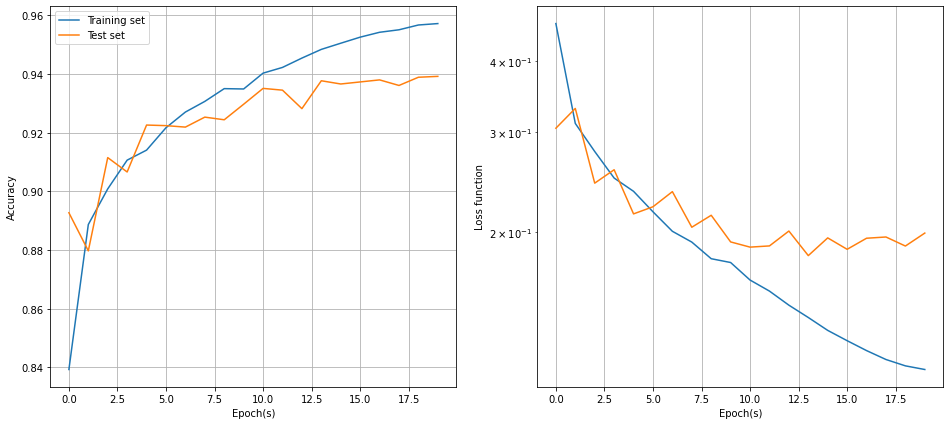

In [36]:
# Plotting

plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label = "Training set")
plt.plot(history4.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.semilogy(history4.history["loss"], label ="Training set")
plt.semilogy(history4.history["val_loss"], label ="Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [37]:
train_loss4, train_acc4 = model4.evaluate(X_train_rs, y_train)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0486 - accuracy: 0.9832


In [110]:
print("Training loss: ", train_loss4)
print("Training accuracy: ", train_acc4)

Training loss:  0.048624902963638306
Training accuracy:  0.9832166433334351


In [38]:
val_loss4, val_acc4 = model4.evaluate(X_test_rs, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1992 - accuracy: 0.9392


In [111]:
print("Val loss: ", val_loss4)
print("Val accuracy: ", val_acc4)

Val loss:  0.19922149181365967
Val accuracy:  0.9391999840736389


# Using model 4 for further investigation
(Model 4 has the best performance for test set)


In [32]:
from tensorflow import keras
model_name = 'model4_cnn.h5'
model4.save(model_name, save_format='h5')

In [34]:
model4_cnn = tf.keras.models.load_model('model4_cnn.h5')

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_onehot = model4_cnn.predict(X_test_rs)


In [45]:
y_pred_onehot.shape

(10000, 10)

In [46]:
pd.DataFrame(y_pred_onehot)

,0,1,2,3,4,5,6,7,8,9
0,1.727612e-10,1.943351e-10,2.228297e-10,2.452835e-09,5.430154e-10,1.209468e-06,1.278604e-09,4.728403e-06,8.738652e-13,9.999940e-01
1,9.247585e-07,5.216538e-10,9.999988e-01,5.731176e-08,2.137926e-07,7.727828e-10,5.202335e-08,4.306750e-10,9.753953e-11,3.991032e-10
2,2.320678e-12,1.000000e+00,4.092869e-12,5.882974e-11,7.086610e-13,2.662139e-11,1.496842e-09,6.146371e-13,1.927557e-12,2.992156e-13
3,3.745838e-13,1.000000e+00,8.861048e-12,2.257902e-11,1.167165e-11,2.226788e-11,3.829598e-08,1.521398e-12,4.959553e-13,2.384963e-13
4,6.281853e-02,1.623037e-07,6.016260e-05,7.006843e-06,7.963359e-04,5.129443e-07,9.363170e-01,6.503390e-09,8.437803e-10,3.374282e-07
...,...,...,...,...,...,...,...,...,...,...
9995,1.034654e-11,2.422903e-14,2.242390e-12,6.406470e-13,1.954102e-12,1.588785e-10,1.542224e-11,1.626080e-07,2.693477e-15,9.999999e-01
9996,6.178138e-14,1.000000e+00,1.223432e-11,1.694806e-09,5.663020e-11,1.559335e-12,1.848531e-08,4.450542e-13,2.012964e-14,6.181258e-15
9997,1.325384e-11,1.556723e-11,3.389026e-12,1.322599e-10,6.431582e-13,4.641060e-11,3.935186e-09,1.826705e-12,1.000000e+00,1.711168e-11
9998,2.386039e-19,1.000000e+00,8.921267e-16,1.576024e-18,8.936107e-18,5.530306e-15,5.150788e-13,1.642053e-18,2.974699e-19,8.921116e-19


In [47]:
#Convert to classes
y_pred = np.argmax(y_pred_onehot, axis=1)

In [48]:
pd.DataFrame(y_pred)

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [57]:
from sklearn.metrics import plot_confusion_matrix

classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']
print(classification_report(y_test, y_pred, target_names=classes))


              precision    recall  f1-score   support

 T-shirt/Top       0.90      0.88      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.93      0.91      1000
       Dress       0.95      0.96      0.95      1000
        Coat       0.91      0.91      0.91      1000
     Sandals       0.98      1.00      0.99      1000
       Shirt       0.83      0.79      0.81      1000
     Sneaker       0.96      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
 Ankle boots       0.99      0.95      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



**Observations**

Model 4 does not perform well for the category of "**Shirt**":
1. Lowest scores for Precision and Recall 
2. Precision 83% i.e. model is only 83% of the time correct when it predicts the object is Shirt.
3. Recall 79% i.e. model is less than 80% of the time able to classify that a Shirt is actually a Shirt.

However, Model 4 performs well in particular for categories of **Sandals and Bag**.

# Display prediction results - Red is wrong prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


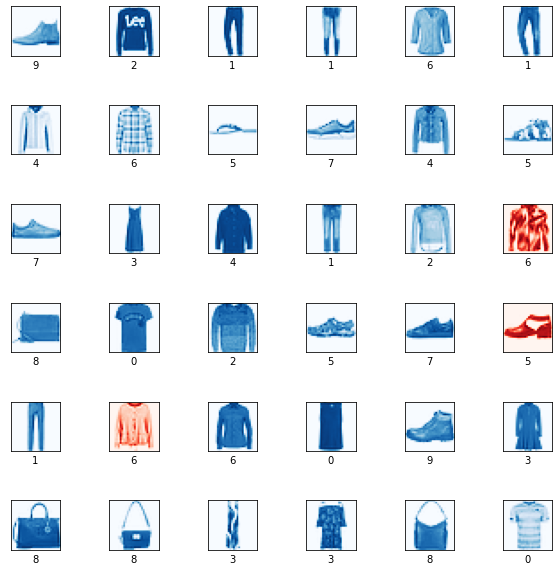

In [59]:
#Display y_pred vs y_test
ndis = 36
n = math.sqrt(ndis)

plt.figure(figsize=(10,10))
for i in range(ndis):
  pred_label = y_pred[i]
  plt.subplot(n,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Blues' if pred_label == y_test[i] else 'Reds'
  plt.subplot(n, n, i+1)
  plt.imshow(X_test[i], cmap=color_map)
  plt.xlabel(pred_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


# Tabulate results

In [112]:
#Result tabulation
models = [('Model 1', train_acc1, val_acc1, 'Dropout = 0.2'),
          ('Model 2', train_acc2, val_acc2, 'Dropout = 0.4'),
          ('Model 4', train_acc4, val_acc4, 'multi layer CNN')
         ]

predict = pd.DataFrame(data = models, columns=['Models', 'Training Accuracy', 'Test Accuracy','Comments'])
predict

,Models,Training Accuracy,Test Accuracy,Comments
0,Model 1,0.986433,0.9139,Dropout = 0.2
1,Model 2,0.979433,0.9120,Dropout = 0.4
2,Model 4,0.983217,0.9392,multi layer CNN


# Plotting key metrics of the 3 models

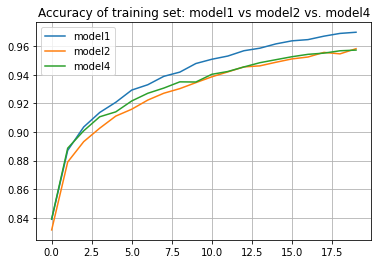

In [113]:
plt.plot(history1.history['accuracy'], label='model1')
plt.plot(history2.history['accuracy'], label='model2')
plt.plot(history4.history['accuracy'], label='model4')
plt.title('Accuracy of training set: model1 vs model2 vs. model4')
plt.grid()
plt.legend()
plt.show()

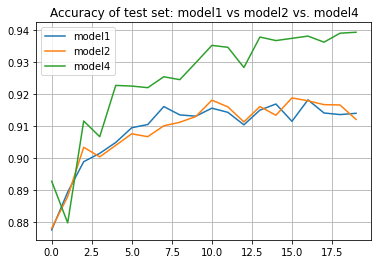

In [117]:
plt.plot(history1.history['val_accuracy'], label='model1')
plt.plot(history2.history['val_accuracy'], label='model2')
plt.plot(history4.history['val_accuracy'], label='model4')
plt.title('Accuracy of test set: model1 vs model2 vs. model4')
plt.grid()
plt.legend()
plt.show()


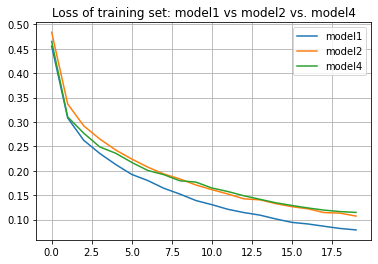

In [115]:
plt.plot(history1.history['loss'], label='model1')
plt.plot(history2.history['loss'], label='model2')
plt.plot(history4.history['loss'], label='model4')
plt.title('Loss of training set: model1 vs model2 vs. model4')
plt.grid()
plt.legend()
plt.show()

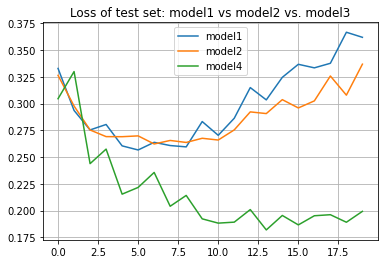

In [116]:
plt.plot(history1.history['val_loss'], label='model1')
plt.plot(history2.history['val_loss'], label='model2')
plt.plot(history4.history['val_loss'], label='model4')
plt.title('Loss of test set: model1 vs model2 vs. model3')
plt.grid()
plt.legend()
plt.show()

# Conclusion

1. All 3 models suggest overfitting.
2. With dropout = 0.25 and a multi-layer CNN, Model 4 has the most promising performance amongst the 3 models tested
 - Higest validation accuracy
 - Lowest validation loss
3. In Model 4, the category "Shirt" stands out as a problematic class for the model.
 - Lowest in Precision and Recall score
 - The model has difficulty making the correct prediction of the "Shirt" class.
 - The model performs very well for the "Sandals" and "Bags" classes.
 - In particular, it scores a 100% recall rate for Sandals i.e. when the model is presented with a pair of sandals, it predicts correctly 100% of the time.